In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, classification_report
import pickle

In [2]:
dataset=pd.read_csv("Preprocessed_car_resale_data.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_id        120 non-null    int64  
 1   make          120 non-null    int64  
 2   year          120 non-null    int64  
 3   engine_size   120 non-null    float64
 4   mileage       120 non-null    int64  
 5   transmission  120 non-null    int64  
 6   fuel_type     120 non-null    int64  
 7   owner_count   120 non-null    int64  
 8   resale_value  120 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 8.6 KB


In [4]:
dataset.columns

Index(['car_id', 'make', 'year', 'engine_size', 'mileage', 'transmission',
       'fuel_type', 'owner_count', 'resale_value'],
      dtype='object')

In [5]:
quan=[]
qual=[]
for columnName in dataset.columns:
    #print(columnName)
    if(dataset[columnName].dtype=='O'):
        #print("qual")
        qual.append(columnName)
    else:
        #print("quan")
        quan.append(columnName)

In [6]:
quan

['car_id',
 'make',
 'year',
 'engine_size',
 'mileage',
 'transmission',
 'fuel_type',
 'owner_count',
 'resale_value']

In [7]:
qual # there is no qualititative data. because we have already preprocessd the input data

[]

In [8]:
dataset["engine_size"].mean()

2.081887273502618

In [9]:
dataset.describe()

,car_id,make,year,engine_size,mileage,transmission,fuel_type,owner_count,resale_value
count,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000
mean,60.500000,1.975000,2012.275000,2.081887,104982.70000,0.491667,1.008333,2.016667,10021.070753
std,34.785054,1.399054,5.275538,0.500426,58332.01481,0.502027,0.835110,0.819749,3090.293171
min,1.000000,0.000000,2005.000000,1.002519,11062.00000,0.000000,0.000000,1.000000,1777.135467
25%,30.750000,1.000000,2007.750000,1.753467,49735.75000,0.000000,0.000000,1.000000,8283.859703
50%,60.500000,2.000000,2011.500000,2.046561,99684.00000,0.000000,1.000000,2.000000,10257.173185
75%,90.250000,3.000000,2016.250000,2.442643,163137.00000,1.000000,2.000000,3.000000,11841.599544
max,120.000000,4.000000,2021.000000,3.367211,198926.00000,1.000000,2.000000,3.000000,18351.332270


In [10]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode"],columns=quan)
for columnName in quan:
    descriptive[columnName]["Mean"]=dataset[columnName].mean()
    descriptive[columnName]["Median"]=dataset[columnName].median()
    descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]

C:\Users\Mellinaa Sanjeevi\AppData\Local\Temp\ipykernel_15792\1788620666.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  descriptive[columnName]["Mean"]=dataset[columnName].mean()
C:\Users\Mellinaa Sanjeevi\AppData\Local\Temp\ipykernel_1

In [11]:
descriptive

,car_id,make,year,engine_size,mileage,transmission,fuel_type,owner_count,resale_value
Mean,60.5,1.975,2012.275,2.081887,104982.7,0.491667,1.008333,2.016667,10021.070753
Median,60.5,2.0,2011.5,2.046561,99684.0,0.0,1.0,2.0,10257.173185
Mode,1,1,2005,1.002519,11062,0,2,3,1777.135467


# Univariate

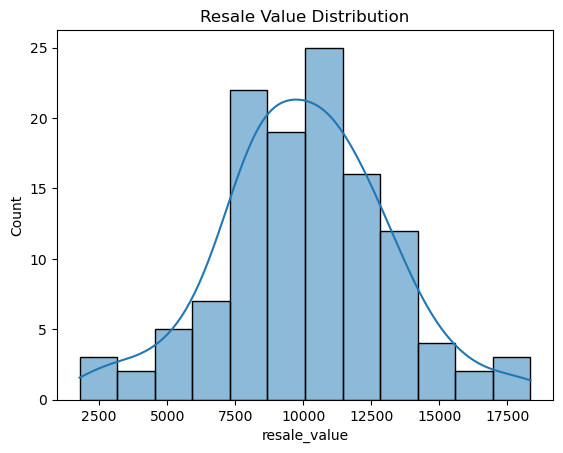

In [13]:
# --- Univariate Analysis ---
# Distribution of Resale Value
sns.histplot(dataset['resale_value'], kde=True)
plt.title("Resale Value Distribution")
plt.savefig("resale_value_distribution.png")
plt.show()

# Bivariate

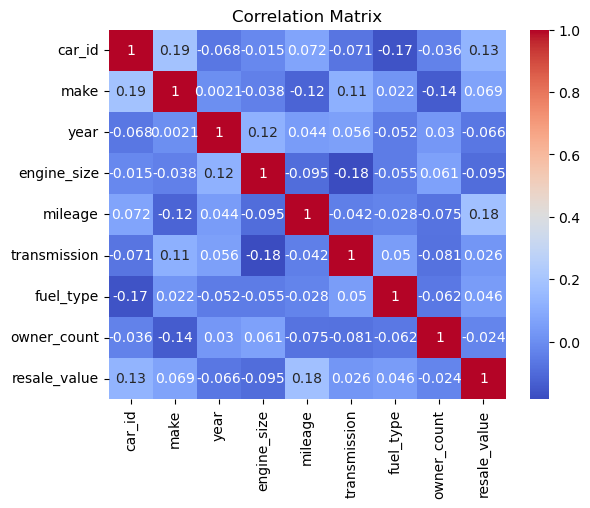

In [15]:
# --- Bivariate Analysis ---
# Correlation matrix
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.png")
plt.show()

# Feature Selection & Model Creation

In [17]:
# --- Feature Selection using RandomForestClassifier ---
features = ["make", "year", "engine_size", "mileage", "transmission", "fuel_type", "owner_count"]
X = dataset[features]
y = dataset["resale_value"]

In [18]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Model

In [20]:
# Regression Model (Resale Value Prediction)
param_grid = {'criterion':['mse','mae','friedman_mse'],
              'max_features': ['auto','sqrt','log2'],
              'n_estimators':[10,100]} 
grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose = 3,n_jobs=-1) 

# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\Mellinaa Sanjeevi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
70 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mellinaa Sanjeevi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mellinaa Sanjeevi\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Mellinaa Sanjeevi\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  Fi

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100]},
             verbose=3)

In [21]:
# print best parameter after tuning 
#print(grid.best_params_) 
re=grid.cv_results_
#print(re)
grid_predictions = grid.predict(X_test) 
   
# print classification report 
from sklearn.metrics import r2_score
r_score=r2_score(y_test,grid_predictions)

print("The R_score value for best parameter {}:".format(grid.best_params_),r_score)

The R_score value for best parameter {'criterion': 'friedman_mse', 'max_features': 'sqrt', 'n_estimators': 100}: -0.44657408013431454


In [25]:
predictions = grid.predict(X_test)
print("Regression MAE:", mean_absolute_error(y_test, predictions))

Regression MAE: 2466.8774236222353


In [27]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,predictions)

In [29]:
r_score

-0.44657408013431454

In [ ]:
# --- Feature Importance (Advanced Feature Selection) ---
importances = regressor.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance.to_csv("feature_importance.csv")
print(feature_importance)

# Classification 

In [ ]:
# --- Classification (Above/Below Threshold Resale Value) ---
threshold = 12000  # Resale value threshold for classification
dataset['high_resale_value'] = dataset['resale_value'] > threshold

In [ ]:
# Classifier Model (Classification: High/Low Resale Value)
X_class = dataset[features]
y_class = dataset['high_resale_value']
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [ ]:
classifier = RandomForestClassifier()
classifier.fit(X_class_train, y_class_train)
y_class_pred = classifier.predict(X_class_test)
print("Classification Report:\n", classification_report(y_class_test, y_class_pred))

# Clustering 

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
dataset['cluster'] = kmeans.fit_predict(X)

In [ ]:
# Plot Clusters
sns.scatterplot(x=dataset['engine_size'], y=dataset['mileage'], hue=dataset['cluster'], palette="viridis")
plt.title("K-Means Clusters (Engine Size vs Mileage)")
plt.savefig("kmeans_clusters.png")
plt.show()

In [ ]:
# --- Dimensionality Reduction (PCA) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualizing PCA components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dataset['cluster'], cmap="viridis")
plt.title("PCA of Car Features")
plt.savefig("pca_plot.png")
plt.show()